<a href="https://colab.research.google.com/github/Avadhi-Singhal/MachineLearning/blob/SupportVectorMachine/SupportVectorClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [39]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,
                          n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

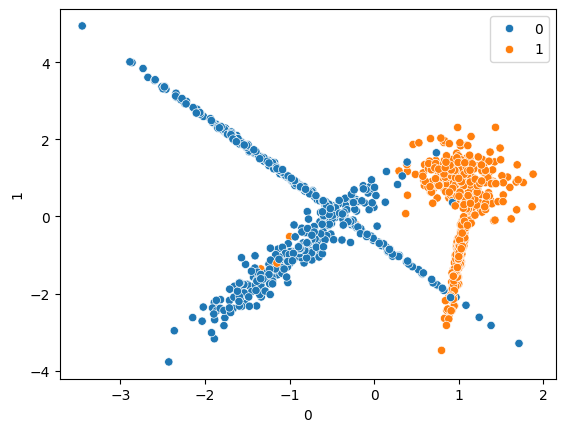

In [40]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [14]:
from sklearn.svm import SVC

In [29]:
svc = SVC(kernel='linear')

In [41]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [42]:
## Prediction
y_pred = svc.predict(x_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       128
           1       0.97      0.98      0.97       122

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[124   4]
 [  3 119]]


In [44]:
rbf = SVC(kernel='rbf')
rbf.fit(x_train,y_train)

SVC()

In [45]:
y_pred1 = rbf.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       128
           1       0.97      0.97      0.97       122

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[124   4]
 [  4 118]]


In [57]:
polynomial = SVC(kernel='poly')
polynomial.fit(x_train,y_train)
y_pred2 = polynomial.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       128
           1       1.00      0.85      0.92       122

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250

[[128   0]
 [ 18 104]]


In [58]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(x_train,y_train)
y_pred3 = sigmoid.predict(x_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       128
           1       0.81      0.85      0.83       122

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[103  25]
 [ 18 104]]


In [49]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C' : [0.1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001],
              'kernel' : ['rbf']}

In [51]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [53]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [54]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [55]:
## Prediction
y_pred4 = grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       128
           1       0.95      0.97      0.96       122

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[122   6]
 [  4 118]]
